# Lecture 09 

## Sampling and Empirical Distributions

## Announcements

1. Exam is Thursday
    - similar in format to practice exams
    - Laura will cover solutions in discussion tomorrow
    - covers Chapters 1 through 9 of the textbook
    - bring your student ID
    - will post seating chart on Piazza
2. Slip day deadline for project is tonight
3. Lab 5 and HW 4 due Friday this week

### Deterministic sample:
* Sampling scheme doesn’t involve chance

### Probability (random) sample:
* Before the sample is drawn, you have to know the probability of selecting each group of people in the population
* Not all individuals need to have an equal chance of being selected

### Example: deterministic sample

Sample of students: take first half of students, alphabetically by last name

### Example: probability sample

Sample of students: flip a coin for each student in class (heads, keep; tails, leave)

### Example: a probability sample
* Population: 3 individuals (A, B, C)
* Select a sample of 2
    - A chosen with probability 1
    - Choose B or C based on coin toss
* Possible samples: AB, AC, BC
    - Chance of AB: ½
    - Chance of AC: ½
    - Chance of BC = 0

In [51]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
   "livereveal", {
       'width': 500,
       'height': 500,
       "scroll": True,
})

{'width': 500, 'height': 500, 'scroll': True}

In [ ]:
top = Table.read_table('top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows))
top = top.move_to_start('Row Index')

top

### Example: deterministic or probabilistic sample?
* a sample of 3 specific rows

In [ ]:
# use take
top.take(make_array(56, 78, 104))

### Example: deterministic or probabilistic sample?
* a sample via a where statement

In [ ]:
# containing "and the"
top.where('Title', are.containing('and the'))

### Discussion question

* Start with a random number from 0 to 9; take every tenth row thereafter.

Is this:  
A. Deterministic  
B. Probabilistic  
C. Neither


### Discussion question

* Start with a random number from 0 to 9; take every tenth row thereafter.

If our table has 87 rows, what is the probability that row 34 is included in our sample?

|Option|Answer|
|---|---|
|A| $\dfrac{1}{87}$
|B| $\dfrac{34}{87}$
|C| $\dfrac{1}{10}$
|D| none of the above

###  Answer
* Start with a random number; take every tenth row thereafter.
* Any given row is equally likely to be picked! (But not true for groups of rows!)

In [ ]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

### Example: sample uniformly at random with(out) replacement
* `Table.sample` method
* `with_replacement=True` is default.

In [ ]:
choices = np.arange(top.num_rows)
sample = np.random.choice(choices, 5)
top.take(sample)

In [ ]:
# with replacement
top.sample(100).group('Row Index').sort('count', descending=True)

In [ ]:
# without replacement
top.sample(100, with_replacement=False).group('Row Index').sort('count', descending=True)

### Observe
* When sample size is much less than population, sampling without replacement is similar to sampling with replacement.
* When sample size is close to population, this is *not* true.

## Sample of Convenience
* Example: sample consists of whoever walks by
    - Just because you think you’re sampling “at random”, doesn’t mean you are.
* If you can’t figure out ahead of time 
    * what’s the population
    * what’s the chance of selection, for each group in the population

then you don’t have a random sample!

### Examples: 

* Voluntary internet surveys
* Interviewing people on Library Walk
* The first 100 visits to a website after an email campaign begins.

### Samples of convenience: the most common type of sample

* Pros: 
    - Easy 
    - Inexpensive
* Cons: 
    - Results won't generalize to the population as a whole
    - Results are likely biased

### Example: sample of convenience

* Study: determine the average age of gamblers at a casino 
* Methodology: conducted for three hours on a weekday afternoon 
* Bias: Might overrepresent elderly people who have retired and underrepresent people of working age

# Distributions

## Probability Distribution
* Random quantity with various possible values
* “Probability distribution”:
    - All the possible values of the quantity
    - The probability of each of those values

## Empirical Distribution

* Based on observations
* Observations can be from repetitions of an experiment
* “Empirical Distribution”
    - All observed values
    - The proportion of counts of each value

### Example: Dice
* simulate a roll as a sample from a table

In [ ]:
die =  (
    Table()
    .with_column('face', np.arange(1, 7, 1))
)
die

In [ ]:
# roll a single die
die.sample(1)

### The probability distribution is uniform

In [ ]:
bins =  np.arange(0.5, 6.6, 1)
die.hist('face', bins=bins)

### Roll the die and plot the empirical distribution
* Try it for 10, 100, 1000, etc
* What does it converge to?

In [ ]:
die.sample(10)

In [ ]:
die.sample(1000000).hist('face', bins=bins)
# die.sample(10000000).hist('face', bins=bins)

# Large Random Samples

## Law of Averages/Law of Large Numbers

* If a chance experiment is repeated 
    - many times,
    - independently,
    - under the same conditions,
    
then the proportion of times that an event occurs gets closer to the theoretical probability of the event.


*Example:* As you roll a die repeatedly, the proportion of times you roll a 5 gets closer to 1/6.

## Convergence of Empirical Histogram

If the sample size is large, then the empirical distribution of a uniform random sample resembles the distribution of the population, with high probability.

Depends on having a large random sample!

## Application: Estimating Probabilities through Simulation

* The law of averages justifies why we can estimate probabilities through simulation.
* If we simulate many times, the empirical proportion of times that an event occurs is likely to be very close to the true probability of the event.

### Estimating probability: rolling a die $N$ times

### Discussion Question

If you roll a die 4 times. What's P(at least one 6)?

|Option|Answer|
|---|---|
|A| $5/6$|
|B| $1-5/6$|
|C| $1-(5/6)^4$|
|D| $1-(1/6)^4$|
|E| None of the above|


### Answer for 4 rolls
$$ P(\text{at least one 6}) = 1 - P(\text{no 6}) = 1 - \left(\dfrac{5}{6}\right)^4$$

### Answer for N rolls
$$ P(\text{at least one 6}) = 1 - P(\text{no 6}) = 1 - \left(\dfrac{5}{6}\right)^N$$

### Plot the true probability for each N

In [ ]:
#:
rolls = np.arange(1, 51)
at_least_one = Table().with_columns('number of dice', rolls, 'Chance of getting at least one 6', 1-(5/6)**rolls)
at_least_one.scatter('number of dice')

### Estimate the probability for N=20
* What is the chance of getting at least one 6 in 20 rolls?

In [ ]:
faces = np.arange(1, 7)
outcomes = np.random.choice(faces, 20) # pick random number from faces, 20 times
outcomes

In [ ]:
# number of sixes
np.count_nonzero(outcomes == 6)

In [ ]:
rolled6 = 0
trials = 10000
for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes == 6) >=1:
        rolled6 = rolled6 + 1
        
#estimate the probability
rolled6/trials

### Estimate the probability for N=20
* wrap the experiment in a function
* run the experiment many times

In [ ]:
def roll_20(trials):
    rolled6 = 0
    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes == 6) >=1:
            rolled6 = rolled6 + 1

    return rolled6/trials

roll_20(1000)

In [ ]:
estimates = make_array()
for i in np.arange(500):
    estimates = np.append(estimates, roll_20(1000))
    
probs = Table().with_column('estimates', estimates)

In [ ]:
probs.hist()
true_prob = 1 - (5/6)**20
plt.axvline(x=true_prob, c='r');

## Sampling from a Population

Knowing that large random samples resemble the population is extremly practical. This allows us to sample from a population instead of conducting a census.

### Example: distribution of flight delays
* All United flights leaving SFO between 6/1/15 and 8/9/15.
* This is the population.

In [ ]:
united = Table().read_table('united_summer2015.csv')
united

### Distribution of flight delays in the full population


In [ ]:
united.num_rows

In [ ]:
bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=bins, unit='minute')

In [ ]:
# try larger N's
N = 100
united.sample(N).hist('Delay', bins=bins, unit='minute')

### Estimating the mean
* If the distribution of a sample looks like the distribution of the population, does the mean of the sample look like the mean of the population?
* Calculate the mean of all delays (population)
* Compare to the mean of uniform random samples.

In [ ]:
# calculate the mean of population
united_mean = united.column('Delay').mean()
united_mean

In [ ]:
for n in np.arange(100, 10000, 200):
    m = united.sample(n).column('Delay').mean()
    print('number of flights: ', n, '    mean of sample: ', m)

### Distribution of means from uniform samples with replacement
* Nice curve around the mean.
* Does the histogram skew one direction?

In [ ]:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    m = united.sample(100).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from uniform samples without replacement


In [ ]:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    m = united.sample(100, with_replacement=False).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from uniform samples of flights from Denver

* How you sample matters.
* This sample is a probability sample. 
     - Each flight from Denver is equally likely to be in the sample.
     - Each flight from somewhere else is not in the sample.
* Estimation of the mean is highly biased!

In [ ]:
n_experiments = 10000
means = make_array()

den = united.where('Destination', 'DEN')
for n in np.arange(n_experiments):
    m = den.sample(100).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from evenly-spaced random samples
* This sample is a probability sample.
* Why does the histogram look this way?

In [ ]:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    start = np.random.choice(np.arange(20))
    m = united.take(np.arange(start, united.num_rows, 50)).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from deterministic samples
* Low variation and very high bias leads to confidence. 
* But we are way off because the sample was not taken uniformly at random.
* How you sample matters!

In [ ]:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    m = united.take(np.arange(100)).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

# --- End Lecture 09 ---

## Statistical Inference

* Making conclusions based on data in random samples.

### Use it to...
* Guess the value of an unknown (fixed) number.
* Create an estimate of the unknown quantity using a random sample.

### Terminology

* Parameter: A number associated with the population
* Statistic: A number calculated from the sample

A statistic can be used as an estimate of a parameter.

## Approach

* Figure out the code to generate one value of the statistic
* Create an empty array in which you will collect all the simulated values
* For each repetition of the process:
    - Simulate one value of the statistic
    - Append this value to the collection array

### Estimating the number of enemy planes in WWII

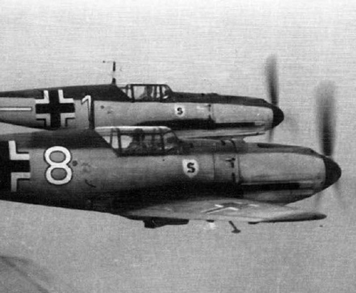

### Setup

* Planes have serial numbers 1, 2, 3, …, N.
* We don’t know N.
* We would like to estimate N based on the serial numbers of the planes that we see.

### The main assumption
The serial numbers of the planes that we see are a uniform random sample drawn with replacement from 1, 2, 3, …, N.

### Discussion Question

If you saw these serial numbers, what would be your estimate of N?
```
170	 271	285	 290	 48
235	 24	 90 	 291 	19
```


- A) 291
- B) 350
- C) 470
- D) Not enough information
- E) Different guess

### The largest number observed

* Is it likely to be close to N?
    - How likely?
    - How close?

### Simulate Serial Numbers
* Fix number of planes at 300
* Sample uniformly with replacement

In [ ]:
#:
N = 300
serialno = Table().with_column('Serial number', np.arange(1, N))
serialno

### Estimate: attempt #1
* Guess: number of planes equal to max observed in sample

In [ ]:
# statistic
serialno.sample(30).column(0).max()

In [ ]:
#:
repetitions = 1000
sample_size = 30
maxes = make_array()
for i in np.arange(repetitions):
    m = serialno.sample(sample_size).column(0).max()
    maxes = np.append(maxes, m)
maxes

In [ ]:
estimates = Table().with_column("estimated_N", maxes)
estimates

In [ ]:
estimates.hist(0, bins=np.arange(200, 400, 10))

### Verdict on the estimate

* The largest serial number observed is likely to be close to N.
* But it is also likely to underestimate N.

### Estimate: attempt #2
* Average of the serial numbers observed  ~  N/2
* Try to estimate the number of planes using twice the average seen in the sample

In [ ]:
#:
repetitions = 1000
sample_size = 30
avgs = make_array()
for i in np.arange(repetitions):
    m = serialno.sample(sample_size).column(0).mean() * 2
    avgs = np.append(avgs, m)
avgs

In [ ]:
#:
estimates = Table().with_column("estimated_N", avgs)
estimates

In [ ]:
#:
estimates.hist(0, bins=np.arange(200, 400, 10))

## Probability Distribution of a Statistic

* Values of a statistic vary because random samples vary
* “Sampling distribution” or “probability distribution” of the statistic
    - All possible values of the statistic and all the corresponding probabilities.
* Can be hard to calculate: 
    - either have to do the math or have to generate all possible samples and calculate the statistic based on each sample


## Empirical Distribution of a Statistic
* Empirical distribution of the statistic
    - Based on simulated values of the statistic
    - Consists of all the observed values of the statistic,
    - and the proportion of times each value appeared

* Good approximation to the probability distribution of the statistic 
    - if the number of repetitions in the simulation is large



## Estimating the Number of Planes
* Statistic: `max`, `2 * mean`
* Probability distribution: 
    - e.g. likelihood `max` of a sample of 30 out of 300 is equal to N
* Empirical distribution: histograms from our simulations

## Bias and Variance
* Which statistic was a better estimate?

## Bias
* Biased estimate: On average across all possible samples, the estimate is either too high or too low.
* Bias creates a systematic error in one direction.
* Good estimates typically have low bias.

## Variability

* The degree to which the value of an estimate varies from one sample to another.
* High variability makes it hard to estimate accurately.
* Good estimates typically have low variability.

## Bias-variance trade-off
* The max has low variability, but it is biased.
* 2 * average has little bias, but it is highly variable.
* Life is tough.